In [1]:
import pandas as pd

In [2]:
# Replace 'your_file.tsv' with the actual path to your file
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [6]:
df.shape

(156060, 4)

In [7]:
df.isnull().values.any()

np.False_

In [9]:
df.duplicated().values.any()

np.False_

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
# --- 2. Prepare the Data ---
# Define the features (X) and the target (y)
# We want to predict 'Sentiment' based on the 'Phrase'
X = df['Phrase']
y = df['Sentiment']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.\n")

Data split into 124848 training samples and 31212 testing samples.



In [15]:
# --- 3. Vectorize the Text ---
# Convert the text phrases into numerical data using TF-IDF
# This technique reflects how important a word is to a document in a collection.
print("Vectorizing text data...")
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=156060)

# Fit the vectorizer on the training data and transform both training and test data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("Vectorization complete.\n")

Vectorizing text data...
Vectorization complete.



### Training on Logistic Model

In [16]:
# --- 4. Train the Classification Model ---
# We will use Logistic Regression, a robust and interpretable model.
print("Training the Logistic Regression model...")
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_vec, y_train)
print("Model training complete.\n")

Training the Logistic Regression model...


/home/user/ml_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Model training complete.



### Training on Linear Support Vector Classifier (LinearSVC)

In [26]:
# --- 4. Train the Classification Model ---
from sklearn.svm import LinearSVC

print("Training the LinearSVC model...")
# LinearSVC is often a very strong baseline for text classification
model = LinearSVC(random_state=42, dual=False) # dual=False is recommended when n_samples > n_features
model.fit(X_train_vec, y_train)
print("Model training complete.\n")

Training the LinearSVC model...
Model training complete.



### Training on Multinomial Naive Bayes mode

In [19]:
# --- 4. Train the Classification Model ---
from sklearn.naive_bayes import MultinomialNB

print("Training the Multinomial Naive Bayes model...")
# This model is a classic and effective choice for text data
model = MultinomialNB()
model.fit(X_train_vec, y_train)
print("Model training complete.\n")

Training the Multinomial Naive Bayes model...
Model training complete.



### Training on Random Forst Classifier

In [23]:
# --- 4. Train the Classification Model ---
from sklearn.ensemble import RandomForestClassifier

print("Training the Random Forest model...")
# This model combines multiple decision trees to improve accuracy
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_vec, y_train)
print("Model training complete.\n")

Training the Random Forest model...
Model training complete.



### Evalue Logistic

In [17]:
# --- 5. Evaluate the Model ---
# Make predictions on the unseen test data
y_pred = model.predict(X_test_vec)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"✅ Model Accuracy on the Test Set: {accuracy:.4f}")
print("="*50 + "\n")

✅ Model Accuracy on the Test Set: 0.6335



### Evaluate LinearSVC

In [27]:
# --- 5. Evaluate the Model ---
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"✅ LinearSVC Model Accuracy: {accuracy:.4f}")
print("="*50 + "\n")

✅ LinearSVC Model Accuracy: 0.6572



### Evaluate Multinomial Naive Bayes mode

In [20]:
# --- 5. Evaluate the Model ---
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"✅ MultinomialNB Model Accuracy: {accuracy:.4f}")
print("="*50 + "\n")

✅ MultinomialNB Model Accuracy: 0.6177



### Evaluate Random Forest

In [24]:
# --- 5. Evaluate the Model ---
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print(f"✅ RandomForest Model Accuracy: {accuracy:.4f}")
print("="*50 + "\n")

✅ RandomForest Model Accuracy: 0.6410



In [25]:
# --- 6. Example Prediction ---
# You can now use the trained model to classify new phrases
new_phrase = ["This movie is fantastic and amazing!"]
new_phrase_vec = vectorizer.transform(new_phrase)
prediction = model.predict(new_phrase_vec)

print("Example prediction for a new phrase:")
print(f"Phrase: '{new_phrase[0]}'")
print(f"Predicted Sentiment: {prediction[0]}")

Example prediction for a new phrase:
Phrase: 'This movie is fantastic and amazing!'
Predicted Sentiment: 1


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# This self-contained script trains the final model on all data and generates the submission file.

try:
    # --- 1. Load Both Datasets ---
    print("Loading train.tsv and test.tsv...")
    train_df = pd.read_csv('train.tsv', sep='\t')
    test_df = pd.read_csv('test.tsv', sep='\t')
    print("✅ Data loaded successfully.")

    # --- 2. Prepare and Vectorize Data ---
    print("\nTraining vectorizer on the FULL training dataset...")
    # Get the phrases and sentiments from the full training data
    X_train_full = train_df['Phrase']
    y_train_full = train_df['Sentiment']
    
    # Clean the test data phrases (this was a good fix from before)
    test_phrases = test_df['Phrase'].fillna('')
    
    # Initialize the vectorizer
    vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=156060)
    
    # Fit the vectorizer on the full training data and transform it
    X_train_full_vec = vectorizer.fit_transform(X_train_full)
    
    # Use the SAME fitted vectorizer to transform the test data
    # This ensures the number of features will match perfectly.
    test_phrases_vec = vectorizer.transform(test_phrases)
    print("✅ Vectorization complete.")

    # --- 3. Train the Final Model ---
    print("\nTraining the LinearSVC model on the FULL training dataset...")
    model = LinearSVC(random_state=42, dual=False)
    model.fit(X_train_full_vec, y_train_full)
    print("✅ Model training complete.")

    # --- 4. Make Final Predictions ---
    print("\nMaking predictions on the test data...")
    test_predictions = model.predict(test_phrases_vec)
    print("✅ Predictions are ready.")

    # --- 5. Create and Save Submission File ---
    submission_df = pd.DataFrame({
        'PhraseId': test_df['PhraseId'],
        'Sentiment': test_predictions
    })
    submission_df.to_csv('submission.csv', index=False)
    
    print("\n" + "="*50)
    print("🚀 All done! The file 'submission.csv' has been created.")
    print("Here is a preview:")
    print(submission_df.head())
    print("="*50)

except FileNotFoundError as e:
    print(f"🛑 Error: A file was not found. Please ensure 'train.tsv' and 'test.tsv' are in the same directory.")
    print(f"Details: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Loading train.tsv and test.tsv...
✅ Data loaded successfully.

Training vectorizer on the FULL training dataset...
✅ Vectorization complete.

Training the LinearSVC model on the FULL training dataset...
✅ Model training complete.

Making predictions on the test data...
✅ Predictions are ready.

🚀 All done! The file 'submission.csv' has been created.
Here is a preview:
   PhraseId  Sentiment
0    156061          3
1    156062          3
2    156063          3
3    156064          2
4    156065          2


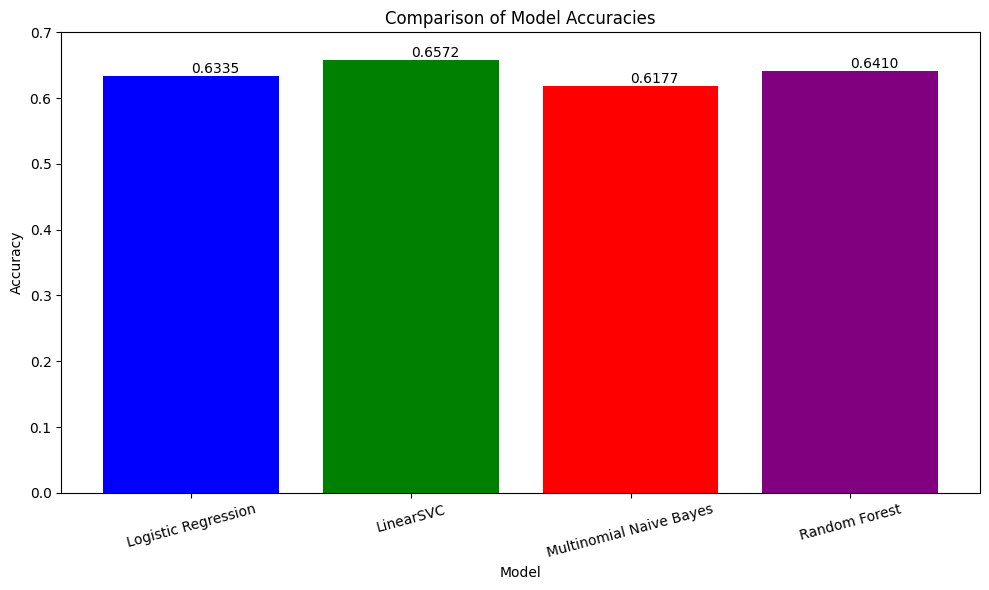

In [3]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'LinearSVC', 'Multinomial Naive Bayes', 'Random Forest']
accuracies = [0.6335, 0.6572, 0.6177, 0.6410]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('model_accuracies.png')